# Project: Investigate a Dataset - Medical Appointment No-Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this project, I will be analyzing the [Medical Appointment No Shows Dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments). The dataset consists of over 110,000 medical appointments from Brazil, and the datset contains the following columns:

1- PatientID - The ID of the patient for the appointment

2- AppointmentID - The ID for the individual appointment 

3- Gender - Gender of patient (either man or woman)

4- ScheduledDay - Date and time the appointment was made

5- AppointmentDay - Date and time of the appointment

6- Age - Age of patient

7- Neighbourhood - Neighbourhood/Area of where appointment takes place

8- Scholarship - Does the patient get government support

9- Hypertension - Does the patient have Hypertension

10- Diabetes - Does the patient have Diabetes

11- Alcoholism - Does the patient have Alcoholism 

12- Handicap - Does the patient have a Handicap and how many

13- SMS_received - Did the patient receive a message about the appointment

14- No-show - Did the patient show up

### Questions for Analysis


#### 1) Is the gender of the patient associated with if they show up for their appointment?

#### 2) Is the age of the patient associated with if they show up to their appointment?

#### 3) Is the day of the week associated with  the amount of no-shows?

#### 4) Is receiving a sms message associated with the rate of people who show up?

#### 5) Is being on the goverment scholarship program associated with the rate of people showing up?

#### 6) Which Neighborhoods have the most no-shows?

#### 7) Which patient conditions, if any, have a higher rate of no-shows than patients who don't have those conditions?

In [64]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


Load data and give a quick inspection

In [2]:
# Load data 
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

Over 110,000 appointments in the data frame and 14 columns

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null data points in the data frame

In [7]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No N/A data points in the data frame

In [8]:
df.duplicated().sum()

0

No duplicated rows of data

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Only 27 days in the appointment day column but over 110,00 appointments

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age is shown as -1, which is not a possible age. This will need to be investigated.

### Data Cleaning

First, I will start by dropping the columns that I am not investigating, those being PatientId, AppointmentId, and ScheduleDay.

In [11]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay' ], axis =1, inplace=True)

Check that we have removed the columns

In [12]:
df.shape

(110527, 11)

Now, I'll deal with the minimum age being -1

In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Create a error variable to store any errors in our age column

In [14]:
age_error = df.query('Age < 0')
age_error

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only 1 error in age, so I will just drop this from the data frame

In [15]:
df.drop(age_error.index, inplace=True)

Confirm that there are no more errors

In [16]:
df.query('Age < 0')

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now I will make an age group variable to make the age easier to graph later

In [17]:
df.loc[(df['Age'] <= 20), 'age_group'] = '20 years and younger'
df.loc[(df['Age'] > 20)&(df['Age'] <= 40), 'age_group'] = 'between 20 and 40 years'
df.loc[(df['Age'] > 40)&(df['Age'] <= 60), 'age_group'] = 'between 40 and 60 years'
df.loc[(df['Age'] > 60), 'age_group'] = 'Older than 60'

In [18]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older than 60
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,between 40 and 60 years
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older than 60
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,20 years and younger
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,between 40 and 60 years


Next I will make the appointment day into the day of week

In [19]:
print(df['AppointmentDay'].dtypes)

object


Create a new variable for day of the week of the appointment
[page on dt.day_name](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html)

In [20]:
df['Day_of_appoint'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

Inspect the new column

In [21]:
df["Day_of_appoint"].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Day_of_appoint, dtype: object

In [22]:
df['Day_of_appoint'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Day_of_appoint, dtype: int64

With only 39 appointments on Saturday, we will drop these from the data set, as the next lowest is 17247 appointments.
First, I create a variable to collect the error in the data.

In [22]:
day_error = df.query("Day_of_appoint == 'Saturday'")
day_error

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group,Day_of_appoint
72295,F,2016-05-14T00:00:00Z,60,SANTO ANTÔNIO,0,0,0,0,0,1,No,between 40 and 60 years,Saturday
72296,M,2016-05-14T00:00:00Z,56,CARATOÍRA,0,0,0,0,0,0,Yes,between 40 and 60 years,Saturday
72297,F,2016-05-14T00:00:00Z,27,CARATOÍRA,1,0,0,0,0,1,No,between 20 and 40 years,Saturday
72298,M,2016-05-14T00:00:00Z,75,CARATOÍRA,0,1,1,0,0,0,No,Older than 60,Saturday
72299,F,2016-05-14T00:00:00Z,67,CARATOÍRA,0,0,0,0,0,1,No,Older than 60,Saturday
72300,F,2016-05-14T00:00:00Z,72,CARATOÍRA,0,1,1,0,0,1,No,Older than 60,Saturday
72301,M,2016-05-14T00:00:00Z,52,CARATOÍRA,0,0,1,0,0,1,No,between 40 and 60 years,Saturday
72302,M,2016-05-14T00:00:00Z,31,ARIOVALDO FAVALESSA,0,0,0,0,1,1,No,between 20 and 40 years,Saturday
72303,F,2016-05-14T00:00:00Z,52,ARIOVALDO FAVALESSA,0,0,0,0,0,0,No,between 40 and 60 years,Saturday
72304,F,2016-05-14T00:00:00Z,58,CARATOÍRA,0,0,0,0,0,1,No,between 40 and 60 years,Saturday


Drop the Saturday data points

In [23]:
df.drop(day_error.index, inplace=True)

Check that the error data is gone

In [24]:
df.query("Day_of_appoint == 'Saturday'")

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group,Day_of_appoint


Change No-show to No_show, as it is a better name format for Python. Fix Hipertension to Hypertension and handcap to handicap.

In [25]:
df.rename(columns = {'No-show' : 'No_show', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'}, inplace=True)
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show', 'age_group', 'Day_of_appoint'],
      dtype='object')

Make No_show into a int variable. No as 0, Yes as 1 to help change it into a boolean variable

In [26]:
df['No_show'].replace({'No' : 0, 'Yes' : 1}, inplace =True)

Now change the Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received and No_show variable into boolean vairables

In [27]:
for i in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No_show']:
    df[i] = df[i].astype('bool')

In [28]:
df.dtypes

Gender            object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship         bool
Hypertension        bool
Diabetes            bool
Alcoholism          bool
Handicap           int64
SMS_received        bool
No_show             bool
age_group         object
Day_of_appoint    object
dtype: object

Change Gender, Neighourhood, Handicap into category variables 

In [29]:
for i in ['Gender', 'Neighbourhood', 'Handicap']:
    df[i] = df[i].astype('category')

In [30]:
df.dtypes

Gender            category
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap          category
SMS_received          bool
No_show               bool
age_group           object
Day_of_appoint      object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

#### Before we deal with explanatory variables for the no-show appointments, I'll look at the appointment results.


In [31]:
df['No_show'].value_counts()

False    88177
True     22310
Name: No_show, dtype: int64

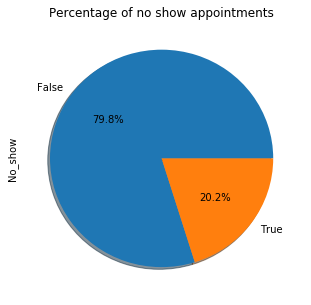

In [32]:
plt.figure(figsize=(5,5))
df.No_show.value_counts(normalize = True).plot(kind = 'pie', autopct='%1.1f%%', shadow=True)
plt.title("Percentage of no show appointments");

We see that 20.2% of appointments are no show appointments.

Create a variable set to the average no show rate

In [33]:
avg_no_show_rate = .202

Now create 2 plot functions we will recall to help answer most of our questions.
First a bar plot.

In [34]:
def bar_plot_func(x_in, y_in, xlabel_in, ylabel_in, title_in, order_in = None , hue_in = None):
    ax = sns.barplot( x = x_in, y = y_in, order = order_in, hue = hue_in)
    ax.set(xlabel = xlabel_in, ylabel = ylabel_in, title = title_in)
    return ax

In [35]:
def count_plot_func(df_in, x_in, xlabel_in, ylabel_in, title_in,  order_in = None):
    ax = sns.countplot(data = df_in, x = x_in, order = order_in)
    ax.set(xlabel = xlabel_in, ylabel = ylabel_in, title = title_in)
    return ax

In this analysis I will be using the Chi squared contingency test to test for association of varialbes more info found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

### Research Question 1 -  Is the gender of the patient associated with if they show up for their appointment?

In [36]:
df['Gender'].value_counts()

F    71810
M    38677
Name: Gender, dtype: int64

There are significantly more women than men in the data set so I will want to use the percent of each gender that doesn't show up to compare if there is a difference.

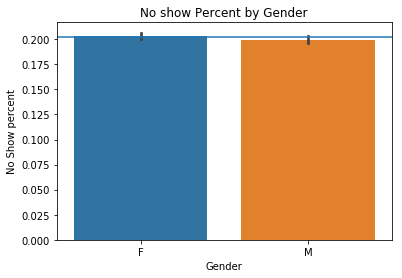

In [37]:
bar_plot_func(df['Gender'], df['No_show'], "Gender", "No Show percent", "No show Percent by Gender")
plt.axhline(avg_no_show_rate);

Now I will use a Chi squared contingency test to test for association between gender and the no-show variable.

Here I use:

H_0: There is no association between No_show and gender

H_1: There is an association between No_show and gender

Alpha = 0.05

In [38]:
cont_table  = pd.crosstab(df['No_show'], df['Gender'])
scipy.stats.chi2_contingency(cont_table, correction = False)

(1.8608293961090543,
 0.17252910658014908,
 1,
 array([[ 57309.82260356,  30867.17739644],
        [ 14500.17739644,   7809.82260356]]))

P value is 0.17, which is larger than alpha so we fail to reject the Null Hypothesis that there is no association between No_show and Gender. Gender is therefore not considered associated with No_show.

### Research Question 2 - Is the age of the patient associated with if they show up to their appointment?

To start, I will plot the age distribution

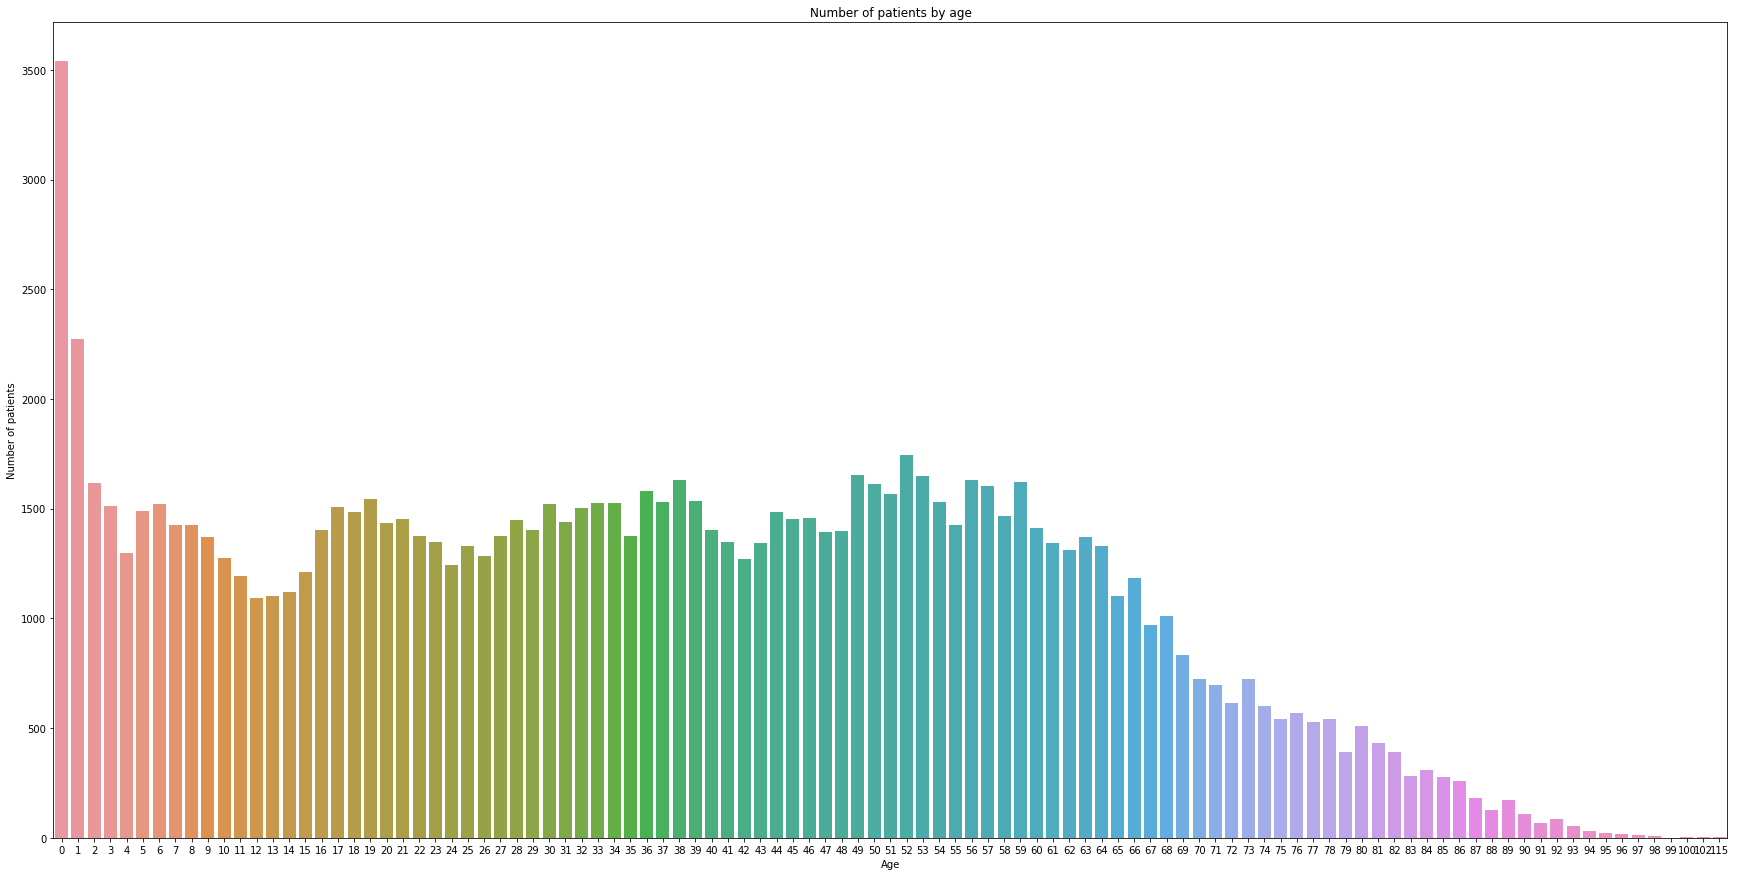

In [39]:
plt.figure(figsize=(30,15))
count_plot_func(df, df['Age'], 'Age', 'Number of patients', 'Number of patients by age');



The distribution of the age of the patients shows that those under 2 have more appointments which makes sense given that they are newborn and need extra care. There are fewer appointments for the older ages, which also makes sense as there would be fewer people in the older ages as patients die out.

Now I will plot the no-show rate for each age

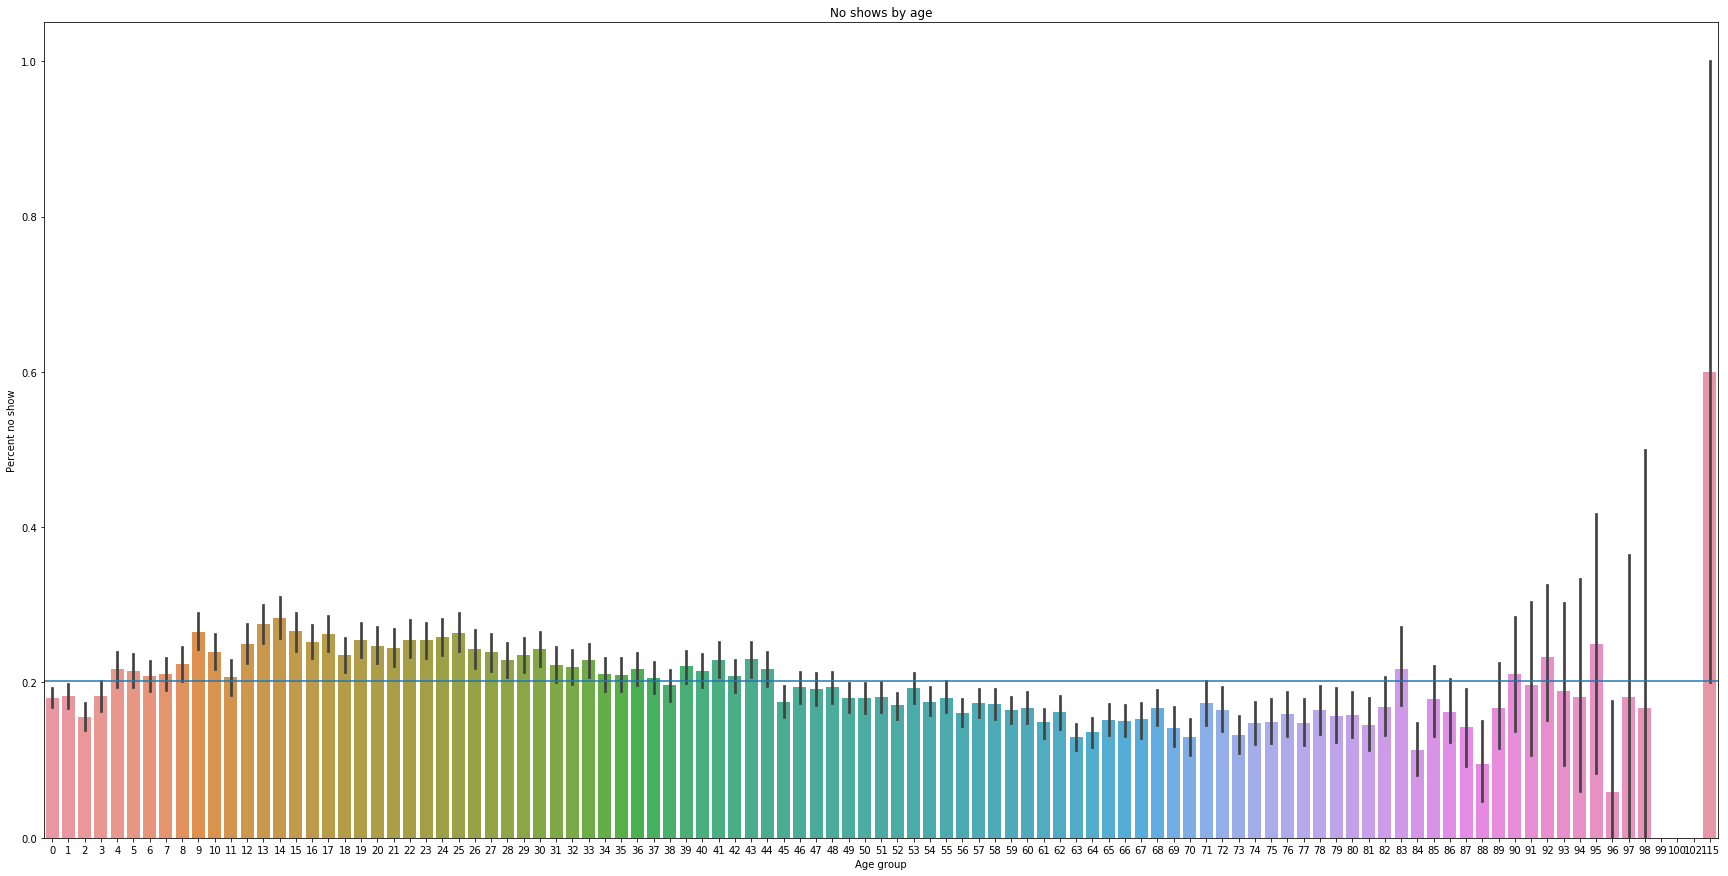

In [40]:
plt.figure(figsize=(30,15))
bar_plot_func(df['Age'], df['No_show'], 'Age group', 'Percent no show', 'No shows by age')
plt.axhline(avg_no_show_rate);

From age 4 to 45, patients tend to miss their appointments more than the average.

I will use the age categories to make a more clear graph and to make it easier to work with the data

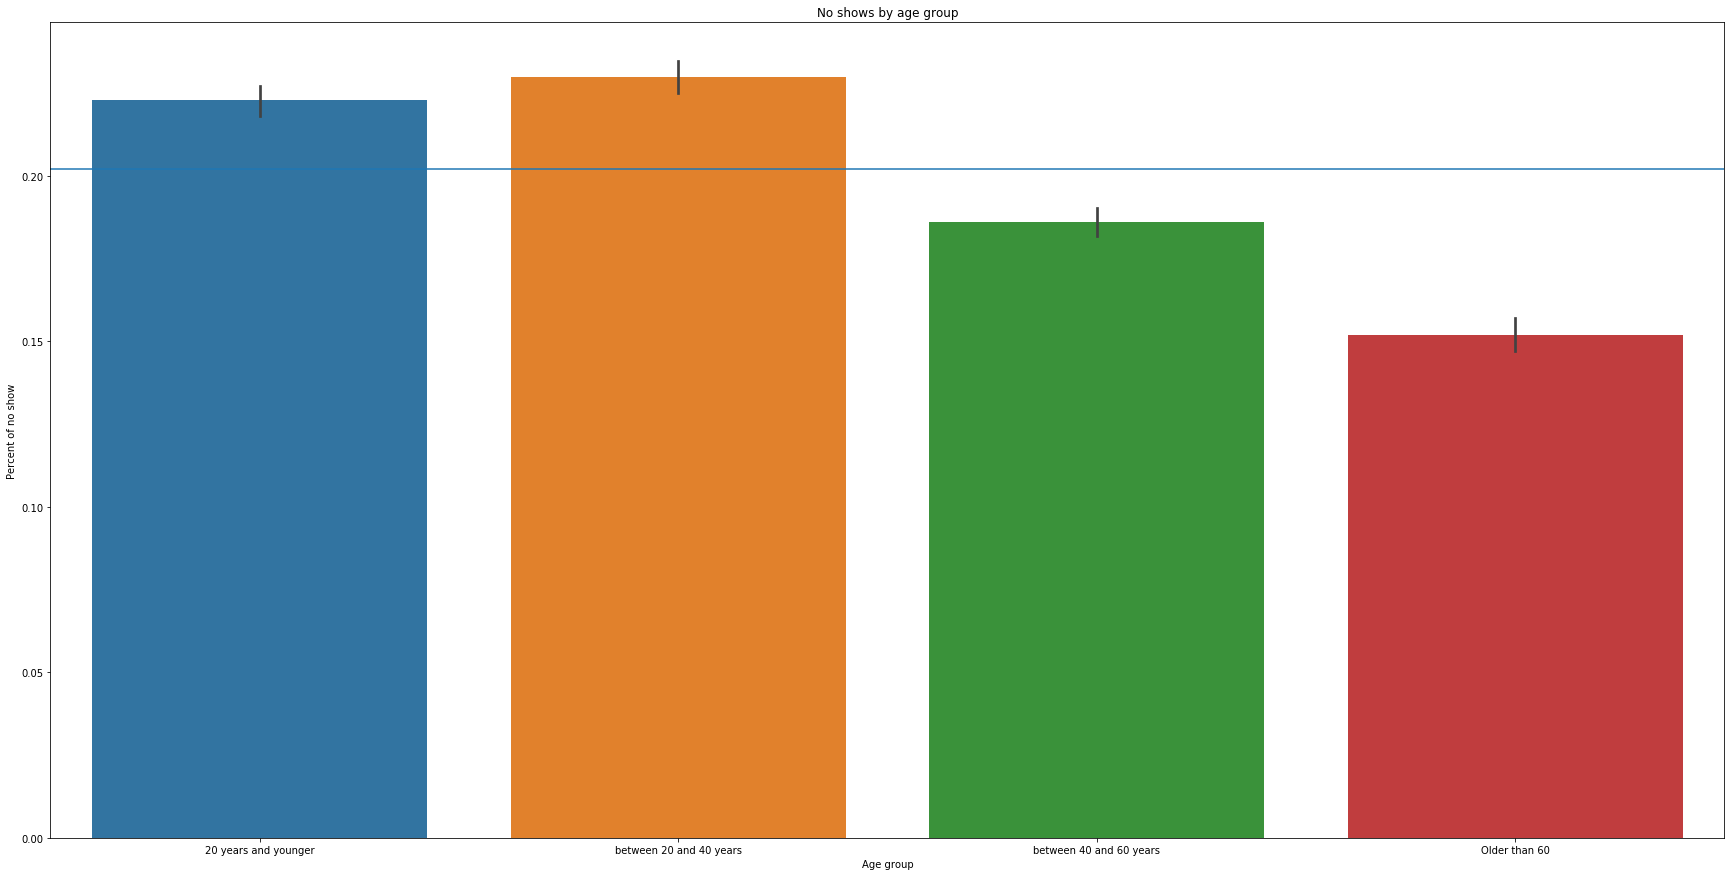

In [41]:
order = ['20 years and younger', 'between 20 and 40 years' , 'between 40 and 60 years', 'Older than 60'] #keeps ages in order
plt.figure(figsize=(30,15))
bar_plot_func(df['age_group'], df['No_show'], 'Age group', 'Percent of no show', 'No shows by age group', order)
plt.axhline(avg_no_show_rate); #overal average no show rate

In [42]:
age_no_show = df.groupby('age_group').No_show.value_counts(normalize = True).sort_values(ascending=False)
age_no_show

age_group                No_show
Older than 60            False      0.847992
between 40 and 60 years  False      0.814103
20 years and younger     False      0.777209
between 20 and 40 years  False      0.770215
                         True       0.229785
20 years and younger     True       0.222791
between 40 and 60 years  True       0.185897
Older than 60            True       0.152008
Name: No_show, dtype: float64

We can see that ages 60 and older show up the most frequently (84.78%). The next most is age 40 to 60 (81.41%), then 20 and younger (77.72%), and finally 20 to 40 (77.02%). So age does appear to be a predictor variable.

Now lets use a Chi squared contingency test to test for association between the age group variable and the no-show variable.

Here we use

H_0: The means of each age group are equal

H_1: The means of at least one age group are not equal

Alpha = 0.05

In [43]:
cont_table  = pd.crosstab(df['No_show'], df['age_group'])
scipy.stats.chi2_contingency(cont_table, correction = False)

(578.16826775458833,
 5.4459325180171279e-125,
 3,
 array([[ 25415.52166318,  15761.19881072,  23006.13084797,  23994.14867813],
        [  6430.47833682,   3987.80118928,   5820.86915203,   6070.85132187]]))

Our P value is 5.446e-125 which is less than alpha so I can reject the null hyphypothesis and conclude that at least 1 age group mean is not the same, and that age group is a predictive variable.

### Research Question 3 - Is the day of the week associated with  the amount of no-shows?


Plot the appointments made on each day

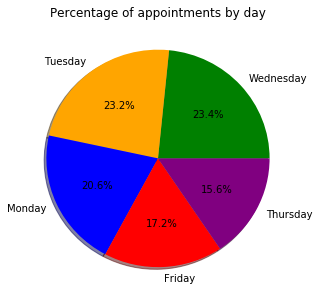

In [44]:
plt.figure(figsize=(5,5))
df.Day_of_appoint.value_counts(normalize = True).plot(kind = 'pie',  autopct='%1.1f%%', shadow=True, colors = ("green", "orange", "blue", "red","purple"))
plt.title("Percentage of appointments by day")
plt.ylabel("");

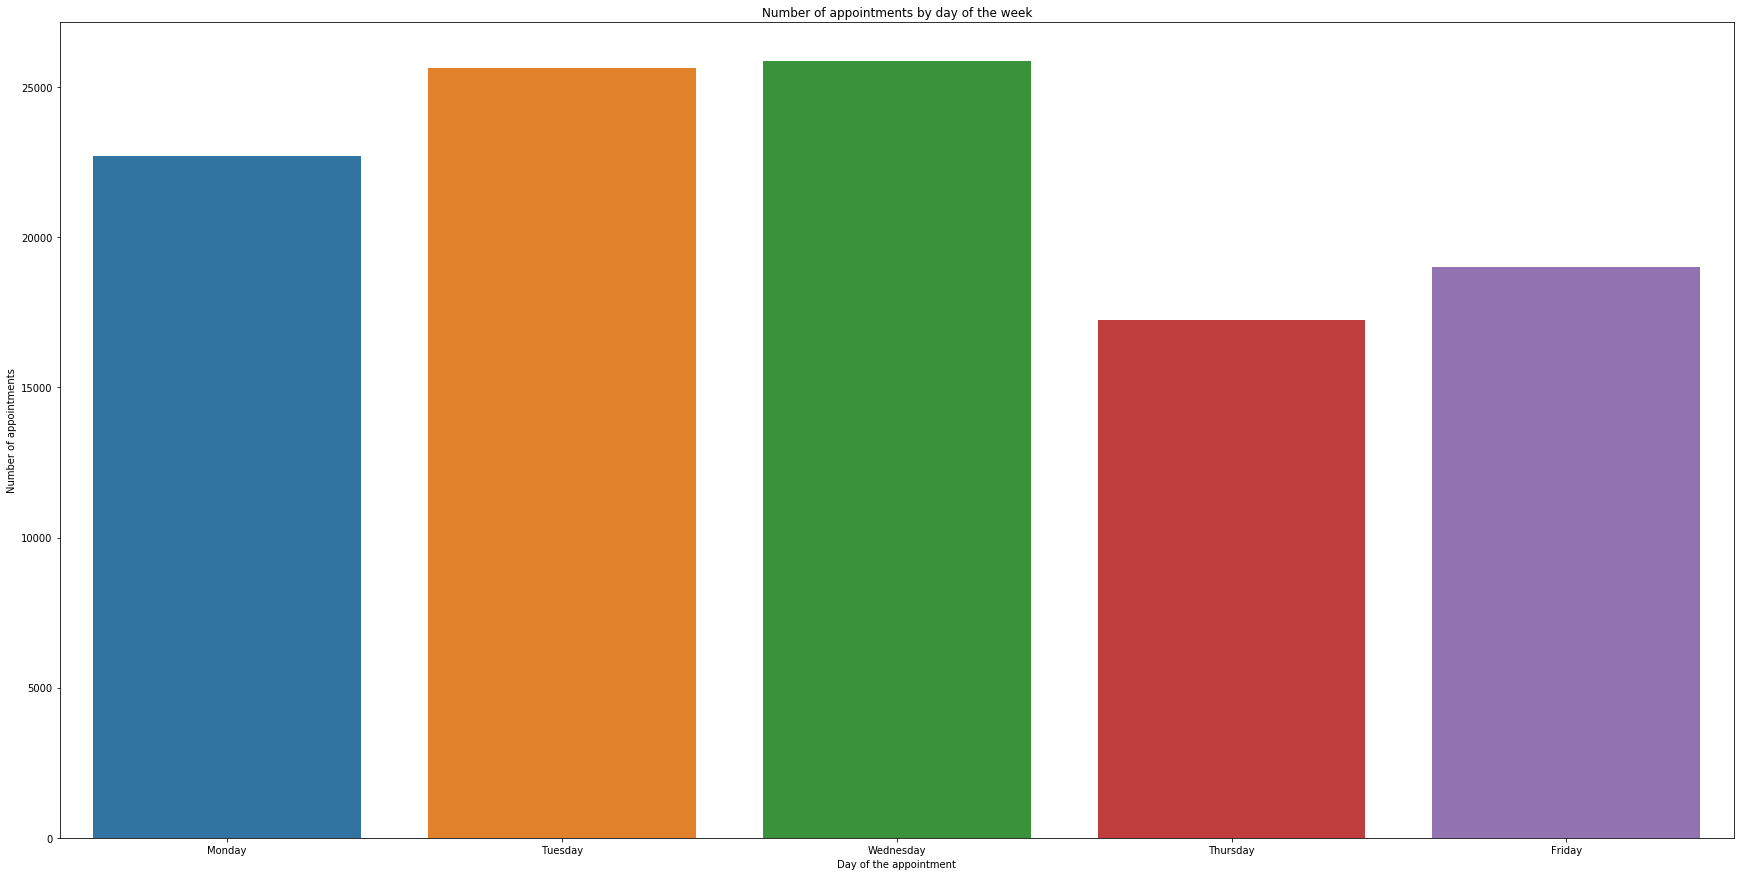

In [45]:
plt.figure(figsize=(30,15))
order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] #keeps days in order
count_plot_func(df, df['Day_of_appoint'], 'Day of the appointment', 'Number of appointments', 'Number of appointments by day of the week', order);

Since Thursday and Friday have significantly fewer appointments than other days, the percentage of no-shows should be used for the analysis.

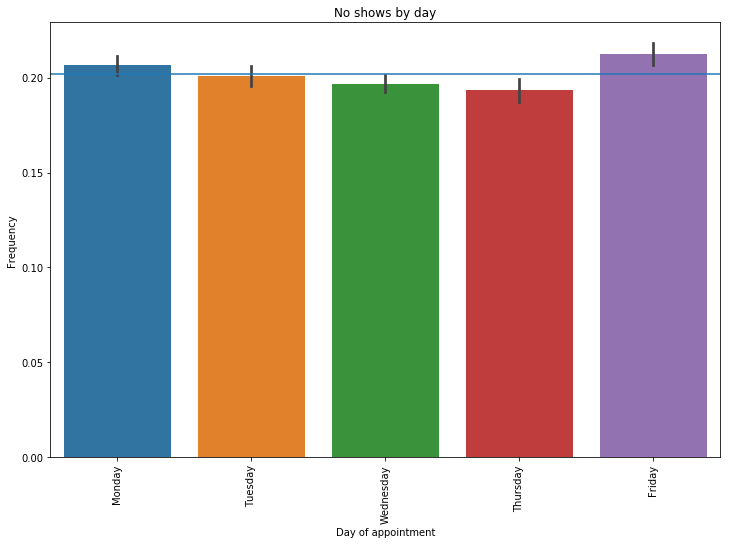

In [46]:
order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] #keeps days in order
plt.figure(figsize=(12,8))
bar_plot_func(df['Day_of_appoint'], df['No_show'], 'Day of appointment', 'Frequency', 'No shows by day', order);
plt.xticks(rotation=90) 
plt.axhline(avg_no_show_rate);#overall average no show rate

No-shows on Monday and Friday are more likely than the average rate. Tuesday shows no difference from the average rate of no shows. Wednesday and Thursday have fewer no shows than the average rate.

In [47]:
day_no_show = df.groupby('Day_of_appoint').No_show.value_counts(normalize = True).sort_values(ascending=False)
day_no_show

Day_of_appoint  No_show
Thursday        False      0.806459
Wednesday       False      0.803108
Tuesday         False      0.799064
Monday          False      0.793519
Friday          False      0.787739
                True       0.212261
Monday          True       0.206481
Tuesday         True       0.200936
Wednesday       True       0.196892
Thursday        True       0.193541
Name: No_show, dtype: float64

Now lets use a Chi squared contingency test to test for association between the day of the appointment variable and the no show variable.

Here we use

H_0: The means of the each age group are equal

H_1: The means of at least one age group are not equal

Alpha = 0.05

In [48]:
cont_table  = pd.crosstab(df['Day_of_appoint'], df['No_show'])
scipy.stats.chi2_contingency(cont_table, correction = False)

(27.279581892126199,
 1.7452149833576686e-05,
 4,
 array([[ 15178.60348276,   3840.39651724],
        [ 18127.49353318,   4586.50646682],
        [ 13764.41317983,   3482.58682017],
        [ 20462.66329975,   5177.33670025],
        [ 20643.82650448,   5223.17349552]]))

With a P value of 1.75 e-05, which is less than alpha, I reject the null hypothesis, which means at least one group's mean is different from the others and that day of the week is associated with whether a patient will no-show or not.

### Research Question 4 - Is receiving a sms message associated with the rate of people who show up?

Plot the no-show rate of the message and no message group

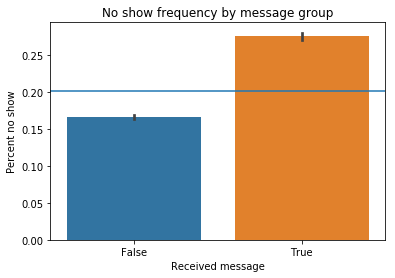

In [49]:
bar_plot_func(df['SMS_received'], df['No_show'],'Received message', 'Percent no show', 'No show frequency by message group')
plt.axhline(avg_no_show_rate); #average overal no show rate

In [50]:
msg_no_show = df.groupby('SMS_received').No_show.value_counts(normalize = True).sort_values(ascending=False)
msg_no_show

SMS_received  No_show
False         False      0.832987
True          False      0.724238
              True       0.275762
False         True       0.167013
Name: No_show, dtype: float64

Clearly, receiving a message is associated with if someone shows up or not, with those that did not recieve a message showing up 83.3% of the time while those that did receive a message showed up only 72.43% of the time.

Now lets use a Chi squared contingency test to test for association between message group variable and the no show variable.

Here we use

H_0: There is no association between No_show and receiving a message

H_1: There is an association between No_show and receiving a message

Alpha = 0.05

In [51]:
cont_table  = pd.crosstab(df['SMS_received'], df['No_show'])
scipy.stats.chi2_contingency(cont_table, correction = False)

(1767.3343921322048, 0.0, 1, array([[ 59870.04974341,  15147.95025659],
        [ 28306.95025659,   7162.04974341]]))

With a p value of 0 being less than alpha, I reject the Null Hypothesis that the means are equal and say that receiving a sms message is a predictive variable.

### Research Question 5 - Is being on the goverment scholarship program associated with the rate of people showing up?

Plot the no show rate of the scholarship and no scholarship groups

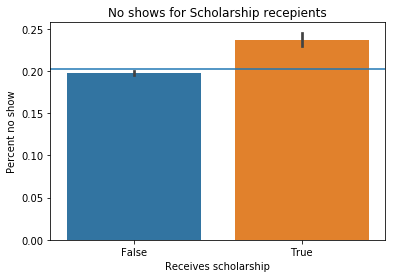

In [52]:
bar_plot_func(df['Scholarship'],df['No_show'], 'Receives scholarship', 'Percent no show', 'No shows for Scholarship recepients')
plt.axhline(avg_no_show_rate); #Overall average no show rate

Receiving a scholarship appears to be associated with the no-show rate of patients

In [53]:
scholar_no_show = df.groupby('Scholarship').No_show.value_counts(normalize = True).sort_values(ascending=False)
scholar_no_show

Scholarship  No_show
False        False      0.801945
True         False      0.762571
             True       0.237429
False        True       0.198055
Name: No_show, dtype: float64

Now lets use a Chi squared contingency test to test for association between scholarship group variable and the no-show variable.

Here we use

H_0: There is no association between No_show and receiving a scholarship

H_1: There is an association between No_show and receiving a scholarship

Alpha = 0.05

In [54]:
cont_table  = pd.crosstab(df['Scholarship'], df['No_show'])
scipy.stats.chi2_contingency(cont_table, correction = False)

(94.190578232164626,
 2.8656144028536692e-22,
 1,
 array([[ 79511.49305348,  20117.50694652],
        [  8665.50694652,   2192.49305348]]))

With a P value of 2.866e-22, I reject the Null Hypothesis that there is no associations between being on a scholarship and the no-show rate.

We see that those that receive the goverment scholarship are slightly more likely to no-show (about 4% more likely).

Explore some of the relationships of the associated variables with the no-show rate

Look at how receiving a message affects the no-show rate of the scholarship variable, since we know that receiving a message is a predictor variable.

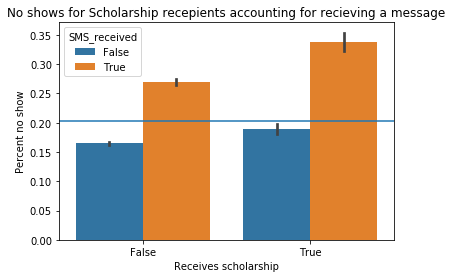

In [55]:
order_in = None
hue_in = df['SMS_received']
bar_plot_func(df['Scholarship'],df['No_show'], 'Receives scholarship', 'Percent no show', 'No shows for Scholarship recepients accounting for recieving a message', order_in, hue_in)
plt.axhline(avg_no_show_rate); #Overall average no show rate

We see that those who do not receive a message and aren't on the scholarship no-show the least of the 4 groups. Those who receive a message and are on the scholarship no-show the most often at almost 35% of the time.

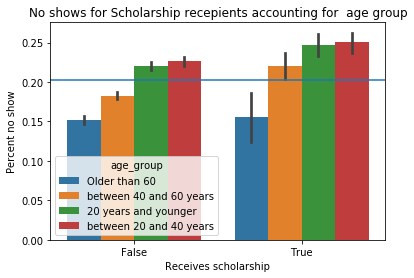

In [56]:
order_in = None
hue_in = df['age_group']
bar_plot_func(df['Scholarship'],df['No_show'], 'Receives scholarship', 'Percent no show', 'No shows for Scholarship recepients accounting for  age group', order_in, hue_in)
plt.axhline(avg_no_show_rate); #Overall average rate

We see that the over 60 group consistently has fewer no-shows than the average rate. The groups under 40 both consistently has more no-shows then the average rate. If the age group of 40 to 60 receives a scholarship, they have more no-shows then the average, but if they do not receive a scholarship they have fewer no-shows then the average rate.

Overall, it appears that the relationships between the associated variables increases no show rates

### Research Question 6 - Which Neighborhoods have the most no-shows?

First, I'll plot all the neighbourhoods

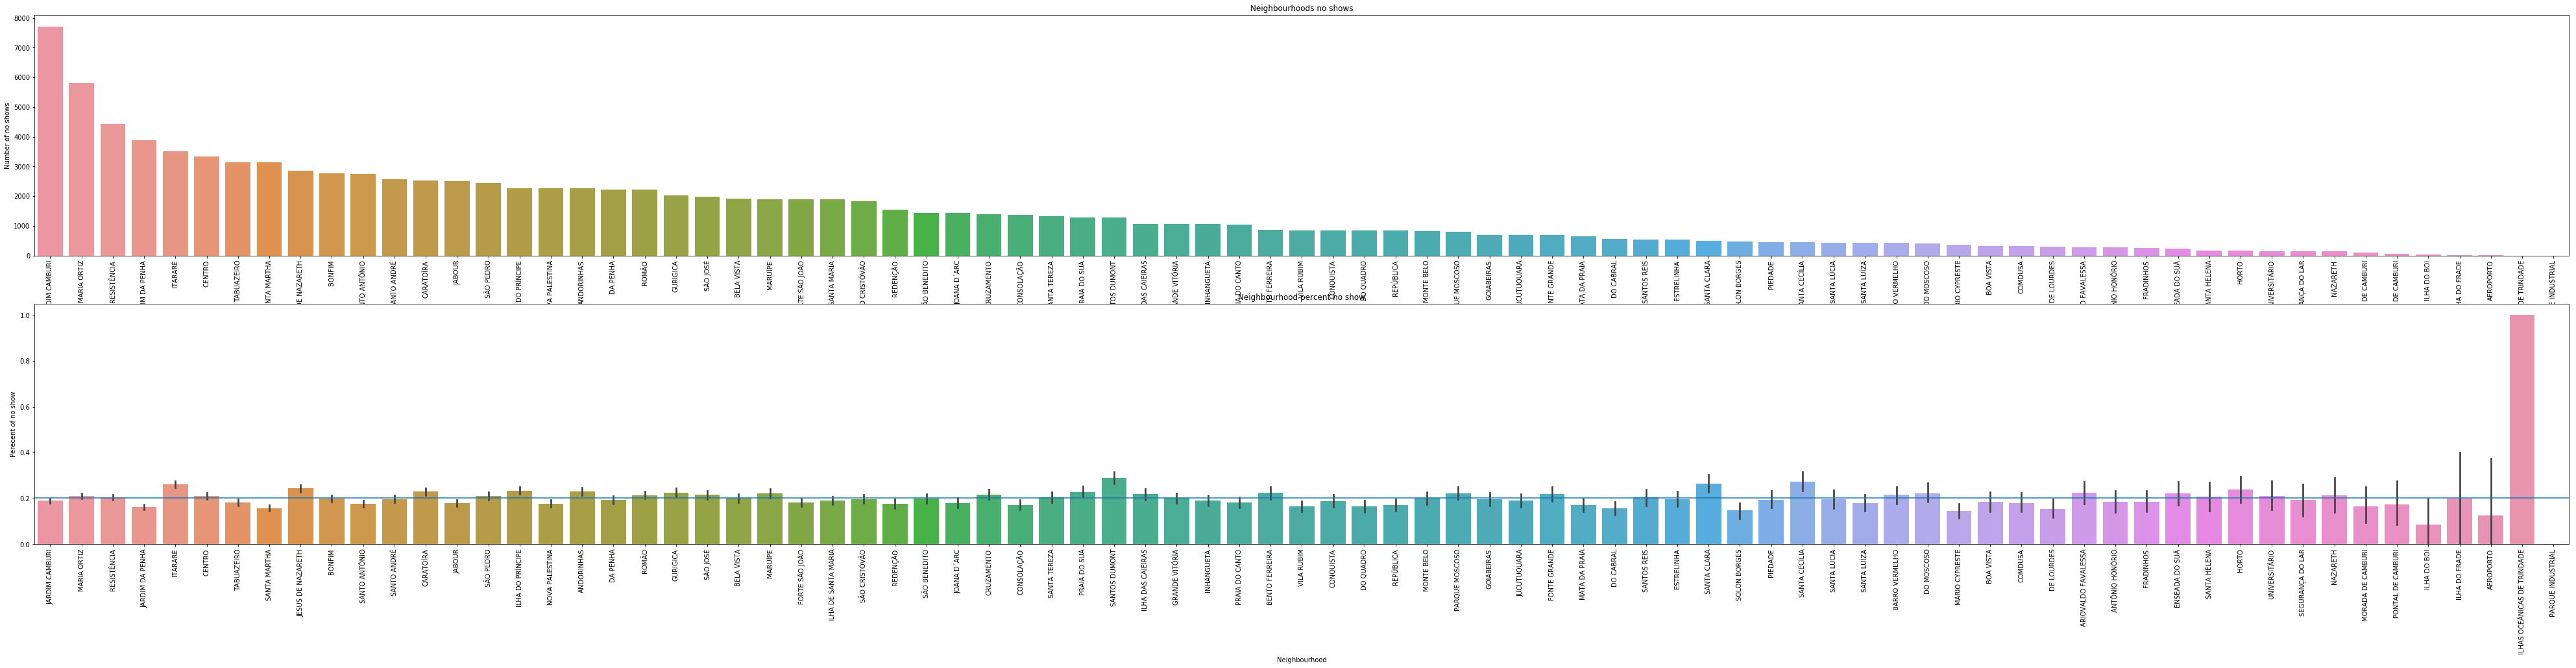

In [57]:
plt.figure(figsize=(70,15))
plt.subplot(2,1,1)
order = df['Neighbourhood'].value_counts().index
count_plot_func(df, df['Neighbourhood'], 'Neighbourhood', 'Number of no shows', 'Neighbourhoods no shows', order)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
bar_plot_func(df['Neighbourhood'], df['No_show'], 'Neighbourhood', 'Perecent of no show', 'Neighbourhood percent no show', order)
plt.axhline(avg_no_show_rate) #Overall average no show rate
plt.xticks(rotation=90);

Now I'll plot the top 5 neighbourhoods for no-shows

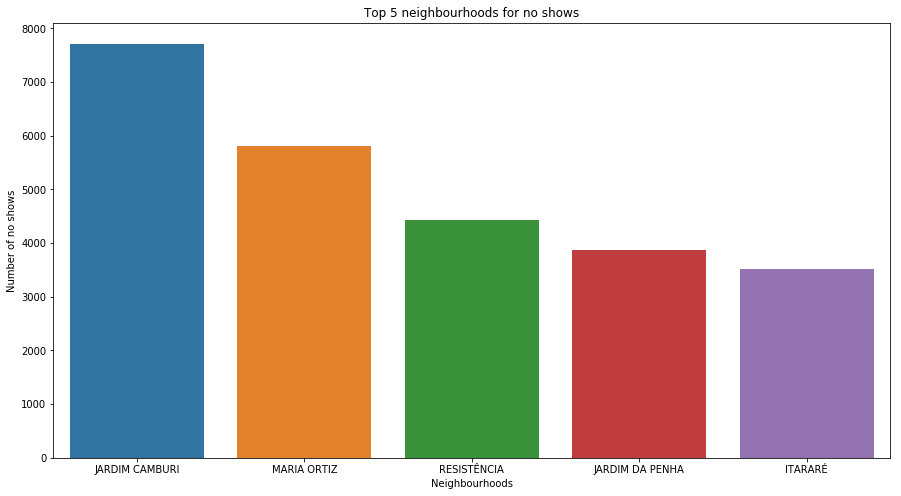

In [58]:
plt.figure(figsize=(15,8))
order_in = df['Neighbourhood'].value_counts().index[:5]
count_plot_func(df, 'Neighbourhood', 'Neighbourhoods', 'Number of no shows', 'Top 5 neighbourhoods for no shows', order_in);

I'll investigate these neighbourhoods a little bit more

I will reuse the same order as before to look at the same neighbourhoods

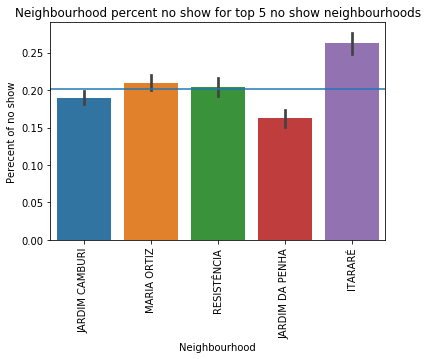

In [59]:
order_in = df['Neighbourhood'].value_counts().index[:5]
bar_plot_func(df['Neighbourhood'], df['No_show'], 'Neighbourhood', 'Perecent of no show', 'Neighbourhood percent no show for top 5 no show neighbourhoods', order_in)
plt.axhline(avg_no_show_rate) #Overall average no show rate
plt.xticks(rotation=90);

We see that Jardim Camburi and Jardim Da Pehna have lower rates of no-shows then the average of the data, while the other 3 neighbourhoods have slightly higher no-show rates.

### Question 7 - Which conditions, if any, have a higher rate of no-shows than patients who don't have those conditions?

The conditions being looked at are hypertension, diabetes, alcoholism, and handicaps. 

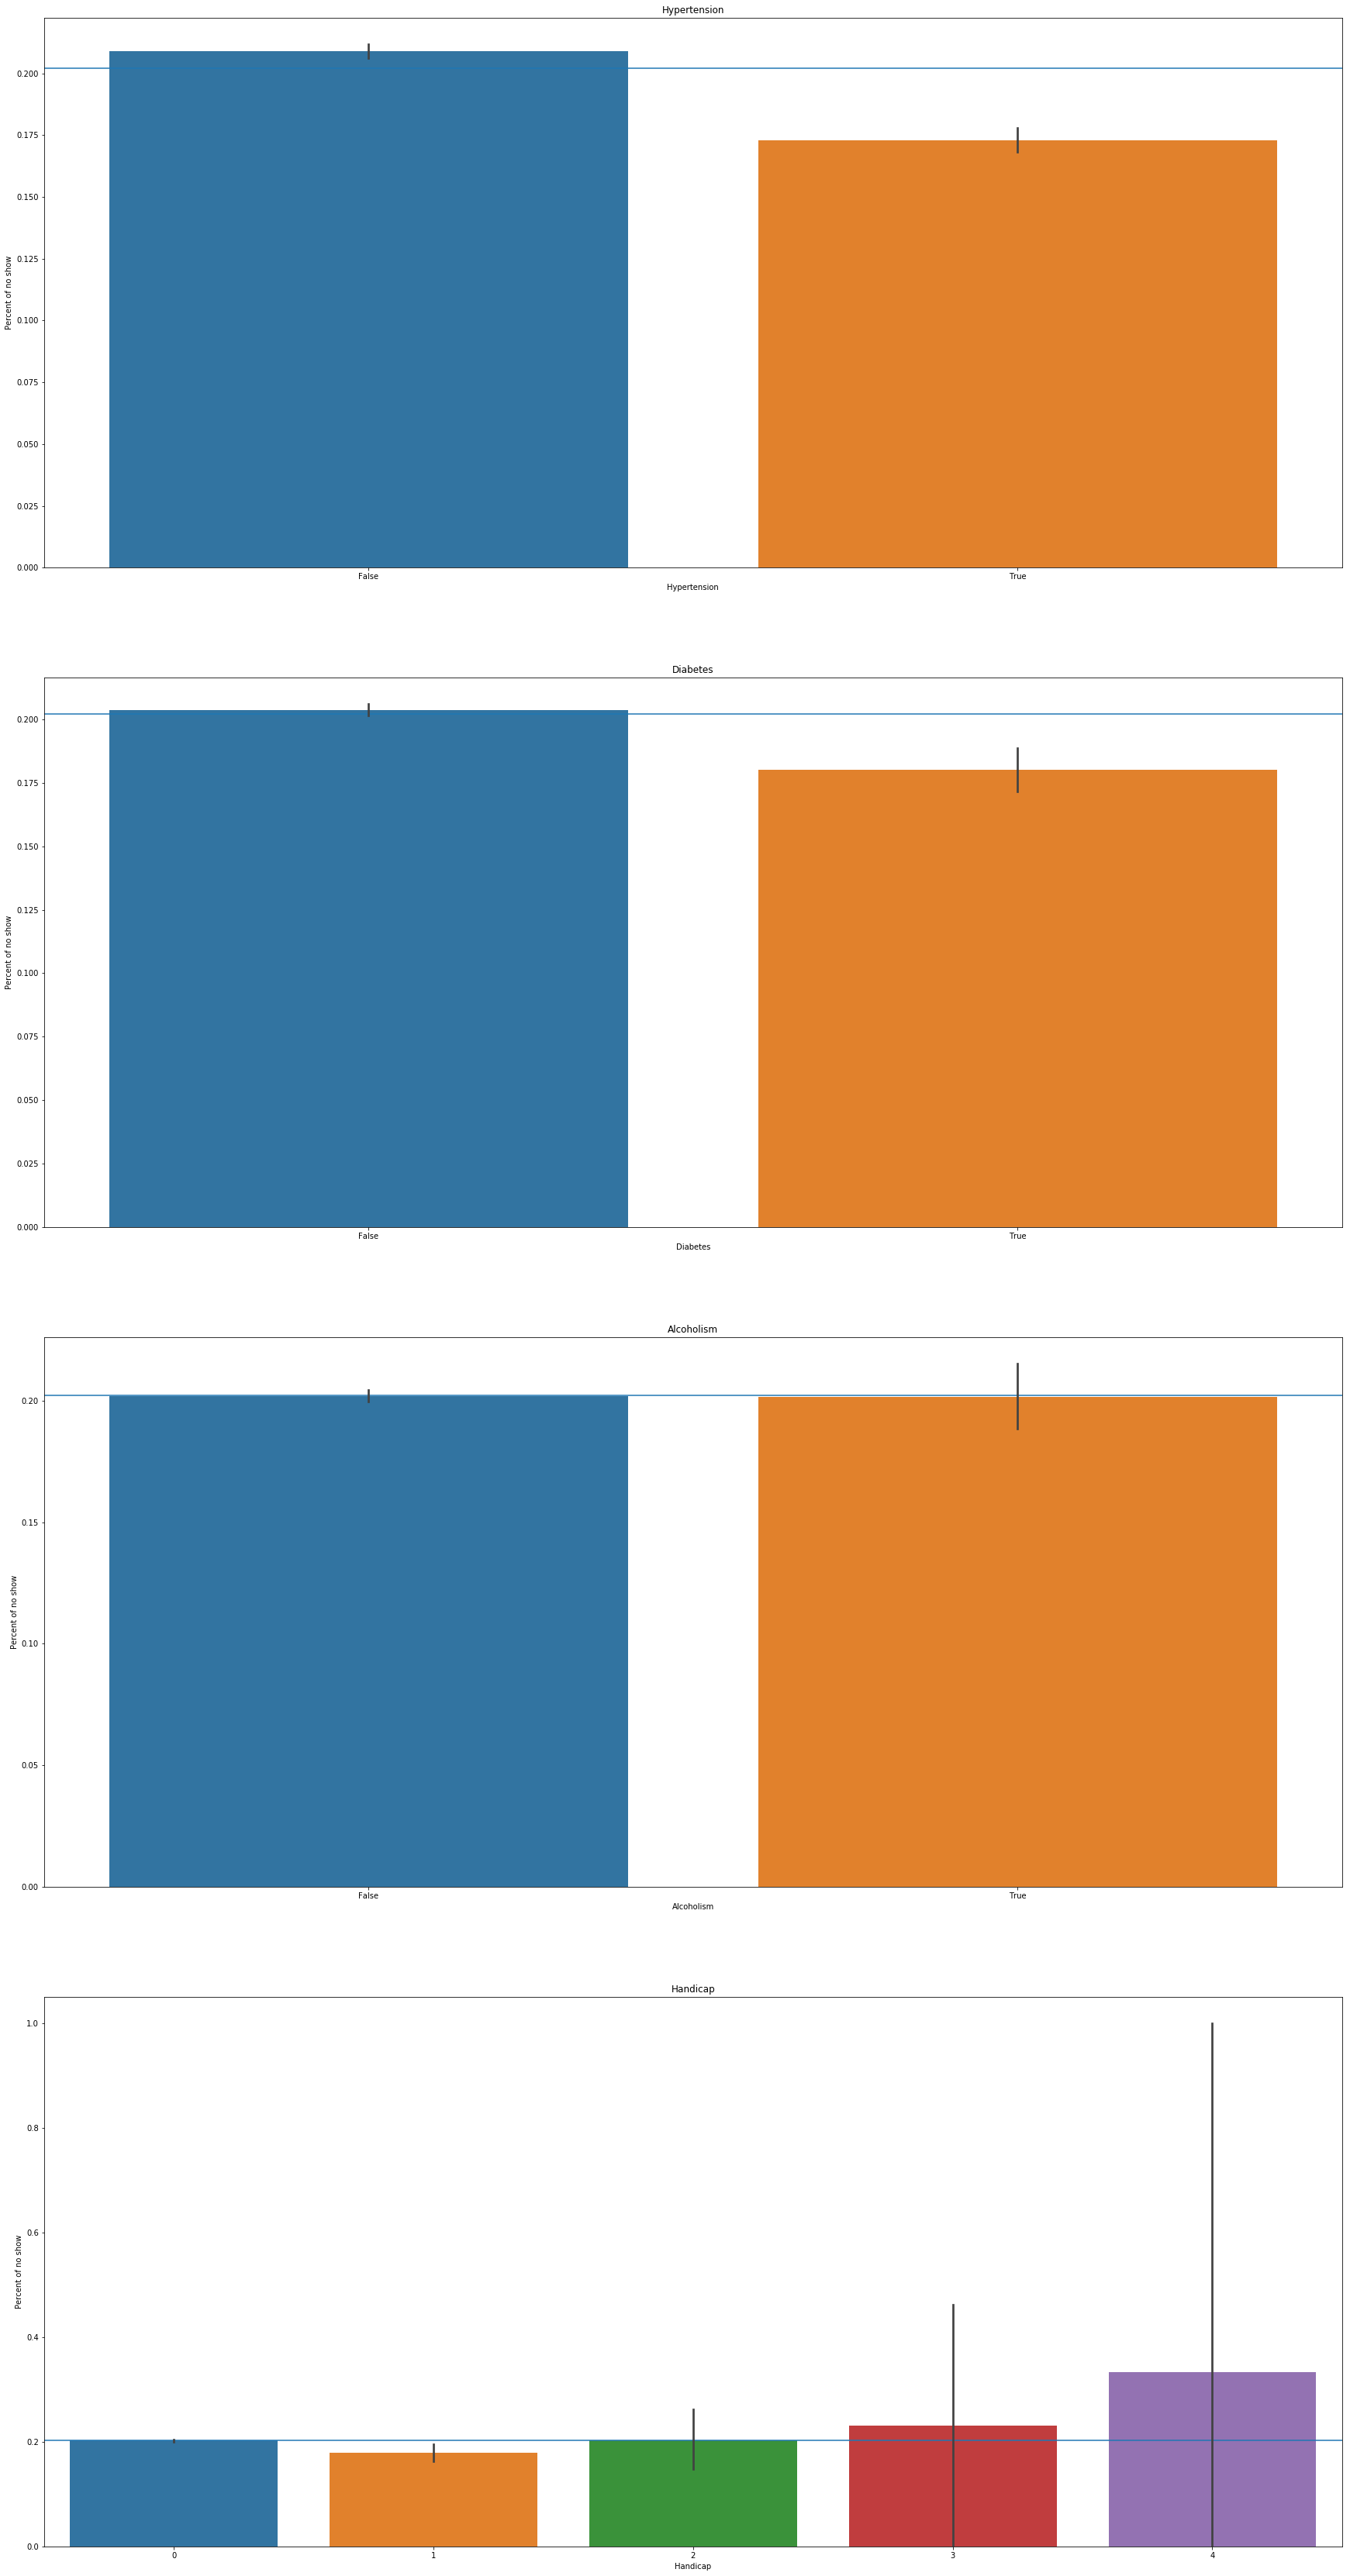

In [60]:
b = 1
plt.figure(figsize=(30,60))
for i in ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']:
    plt.subplot(4,1,b)
    b = b + 1
    plt.axhline(avg_no_show_rate)
    bar_plot_func(df[i], df['No_show'], i , 'Percent of no show', i)

- Alcoholism has no effect on whether patients will no-show or not.
- Patients with diabetes or hypertension no-show less frequently then patients who don't have those conditions.
- Patients with 3 or 4 handicaps have a higher no-show rate than average.

In [81]:
handicap_no_show = df.groupby('Handicap').No_show.value_counts(normalize = True).sort_values(ascending=False)
handicap_no_show

Handicap  No_show
1         False      0.820676
2         False      0.797814
0         False      0.797657
3         False      0.769231
4         False      0.666667
          True       0.333333
3         True       0.230769
0         True       0.202343
2         True       0.202186
1         True       0.179324
Name: No_show, dtype: float64

Patients with 1 handicap no-show about 2% less than those without handicaps. Patients with 1 handicap show up at the same rate as those without handicaps. Patients with 3 handicaps no-show 3% more often then those that don't have a handicap, while patients with 4 or more handicaps no-show 13% more often then those without handicaps.

<a id='conclusions'></a>
## Conclusions

#### 1) Is the gender of the patient associated with if they show up for their appointment?

From the graph, we see that both male and female patients no-show at the same rate as each other. Running a chi squared contingency test found that there is no association between the gender of a patient and if they no-show.


#### 2) Is the age of the patient associated with if they show up to their appointment?

From the age groups that were created, it showed that the patients older than 60 show up the most often at 84.78%, patients in 40 to 60 show up 81.41%, patients 20 and under show up 77.72%, and finally patients to 20 to 40 show up 77.02% of the time. By running a chi squared contingency test, it was found that at least one age group's mean of the no-show variable was different, and that age group is associated with whether patients show up to their appointment.

#### 3) Is the day of the week associated with  the amount of no-shows?

It was found that Thursday had the highest rate of patients showing up to appointments at 80.65% and Friday had the lowest rate of showing up at 78.77%. A Chi squared contingency test was run and found that the day of the week was associated with whether a patient would show up. Below is a table of rates of showing up from highest to lowest.

Thursday    80.64

Wednesday   80.31

Tuesday     79.90

Monday      79.35

Friday      78.77

#### 4) Is receiving a sms message associated with the rate of people who show up?

It was seen that patients who receive a message no-show 27.58% of the time compared to those who do not receive a message, who no-show 16.70% of the time. A chi squared contingency test was run and found that there is a association between receiving a message and showing up.


This result is a little misleading, as those who make appointments on the same day they have them will not get a message and would presumably be less likely to not be able to make their appointment. This result does not necessarily mean that sending a message has a negative impact on if a patient will show up.

#### 5) Is being on the goverment scholarship program associated with the rate of people showing up?

It was seen that those on the scholarship program no-showed 23.74% of the time compared the those that were not on the program who no-showed 19.81% of the time. A chi sqaured contingency test was run and being on the program was found to be associated with not showing up. Age group and recieving a message about the appointment were then explored with the scholarship program variable, as all three were found to associated with not showing up. When more than one associated variable was accounted for, the rate of no-shows increased.


#### 6) Which Neighborhoods have the most no-shows?

It was found that the neighbourhoods Jardim Camburi, Maria Ortiz, Resistencia, Jardim Da Pehna, and Itarare had the largest number of no-shows. It was then shown they are all above average for the number of no-shows but not all were above average for percentage of no shows, so some of the neighbourhoods have larger populations than others.

#### 7) Which conditions, if any, have a higher rate of no-shows than patients who don't have those conditions?

It was found that patients with alcoholsim have the same rate of no-show as the general population, while both those with hypertension and diabetes have fewer no-shows than the general population.

Patients with 1 or 2 handicaps show up more often or as often as the general population. Those patients with 3 handicaps no-show 3% more often, and those with 4 or more no-show 13% more often.


#### Limitations and additional information needed

While I found several variables that were associated with instances of no-show appointments, I did not have access to the income data of patients. Many of the association that we found could be more thoroughly explained if we knew which patients were in lower income brackets. For example, those on the goverment scholarship program appear to have a negative association with their rate of showing up, but if they are the lower income subjects they could be missing appointments due to not being able to leave work to make the appointment. 

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0